# LetsGrowMore Virtual Internship Program (LGMVIP) [Sept.2021 - Oct. 2021]

## Task 4: Prediction using Decision Tree Algorithm

## Author : Pritish Rajpoot

## Level: Intermediate

In this task, we create the Decision Tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [3]:
data =  pd.read_csv("C:/Users/hp/Downloads/IRIS.csv")

### Looking top 5 and bottom 5 values of the datasset

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Getting the size of data

In [6]:
data.shape

(150, 6)

In [7]:
col = data.columns.tolist()
print(col)

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


### Checking for null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values present in the dataset. So no need of handling the null values.

### Getting some Statastical Inference from the Data

In [10]:
data.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


### Data Visualisation

In [11]:
count = data['Species'].value_counts()
count.to_frame()

,Species
Iris-versicolor,50
Iris-setosa,50
Iris-virginica,50


In [12]:
label =  count.index.tolist()
val =  count.values.tolist()

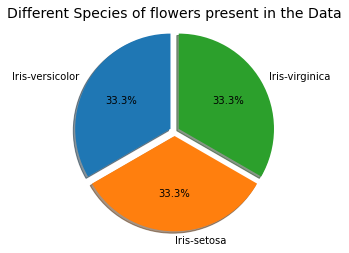

In [13]:
exp =(0.05,0.05,0.05)

fig,ax = plt.subplots()
ax.pie(val, explode=exp, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Different Species of flowers present in the Data', fontsize =  14)
ax.axis('equal')  

plt.show()

<Figure size 1080x432 with 0 Axes>

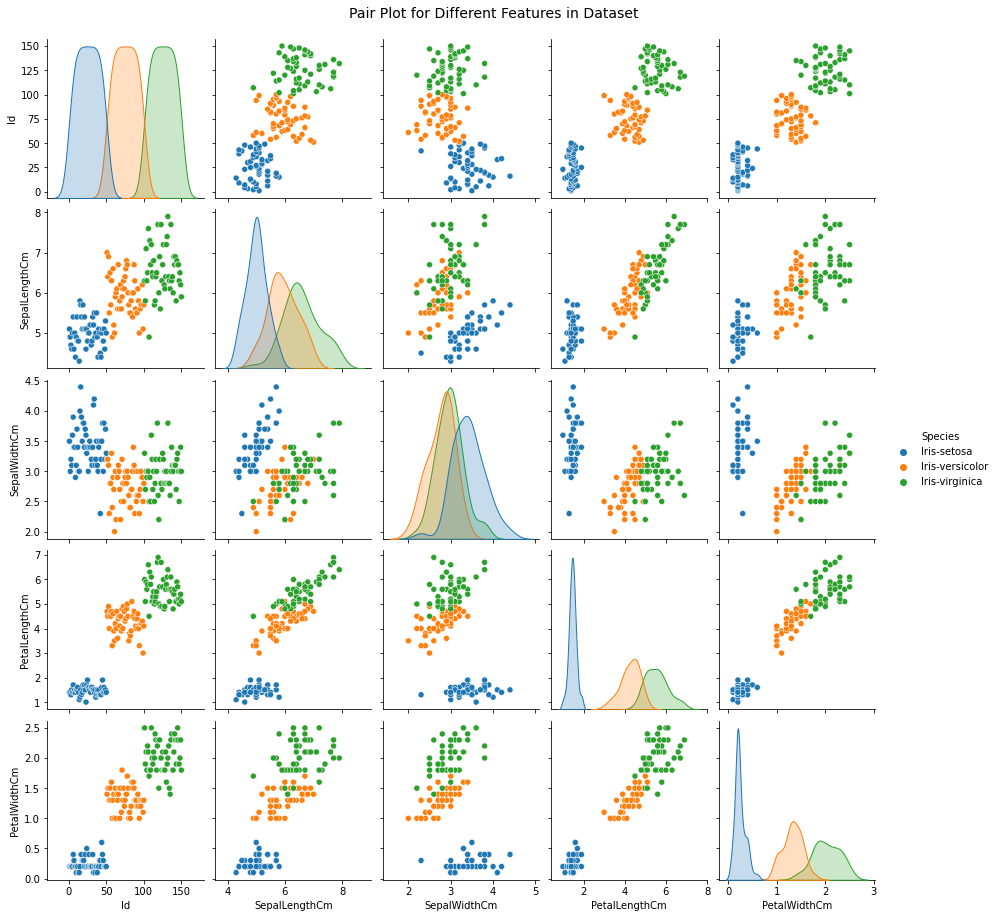

In [14]:
fig =  plt.figure(figsize = (15,6))
visual = sns.pairplot(data, hue =  'Species')
visual.fig.suptitle("Pair Plot for Different Features in Dataset", y = 1.02, fontsize =  14)
plt.show()

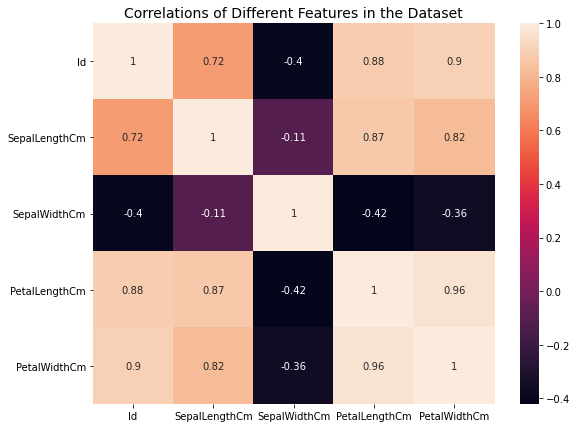

In [15]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlations of Different Features in the Dataset',fontsize =  14)
plt.show()

### Data Preparation

In [16]:
data =  data.drop('Id', axis  = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:

X = data.iloc[:, 0:4]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
Y =  (data.iloc[:, 4])
Y.head().to_frame()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
std =  StandardScaler()
X = std.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size  = 0.3, random_state  =  1)

###  Model Creation

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtc =  DecisionTreeClassifier(criterion =  "entropy", max_depth =  4)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction using the Created Model

In [25]:
y_pred = dtc.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

### Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
acc = accuracy_score(y_test,y_pred)
print("The accuracy of the Decision Tree Algorithm is : ", str(acc*100)+ "%")

The accuracy of the Decision Tree Algorithm is :  95.55555555555556%


In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [29]:
lst = data['Species'].unique().tolist()
df_cm = pd.DataFrame(data = cm, index = lst, columns = lst)
df_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,14,0,0
Iris-versicolor,0,17,1
Iris-virginica,0,1,12


### Data Visualization for the Model

In [30]:
col = data.columns.tolist()
print(col)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


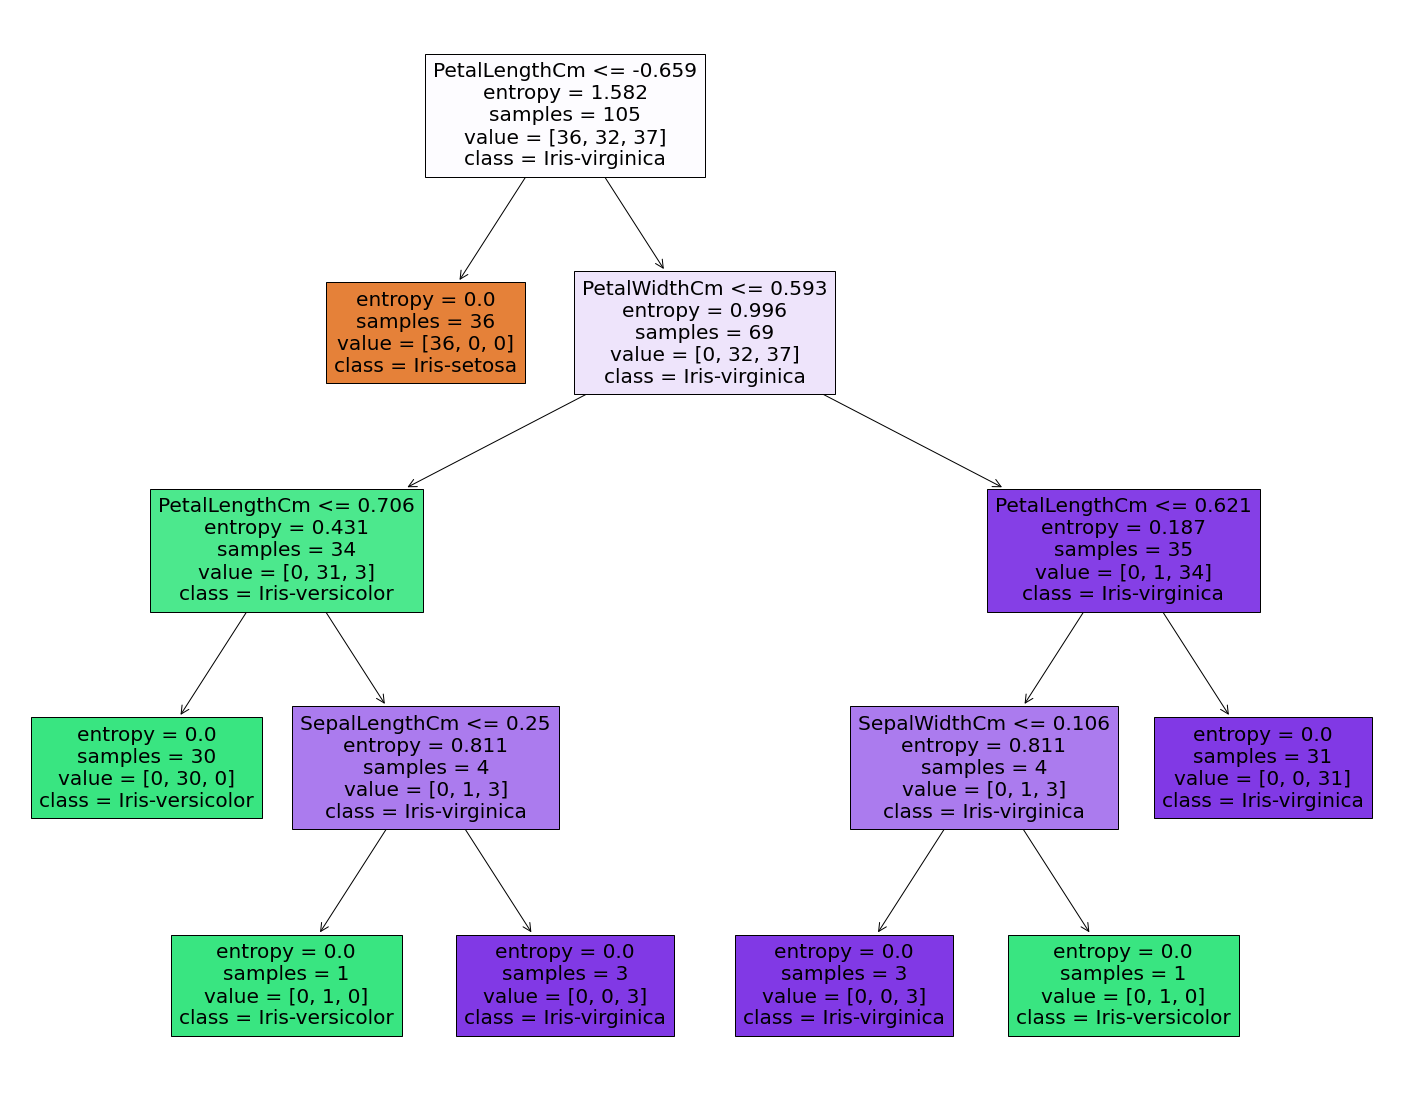

In [31]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree_img = tree.plot_tree(dtc, 
                   feature_names=col,  
                   class_names=lst,
                   filled=True)